# Data Exploration Notebook

## 1. Load Data + Basic Stats

Ultimately the full BYU dataset was so large that trying to train and test a model on it was computionally prohibitive on my machine. Therefore I performed a simple random sample of around 5% of the users and conducted my analysis on this subset. The work in this notebook and the "Tuning and Evaluation" notebook is all done on this subset. See the file "sampling_joining.py" in the code folder for more details on how this sampling was done.

In [15]:
import numpy as np
import pandas as pd

In [16]:
# Load the data
path = "/Volumes/Samsung_T5/Data/little_array.npy"
data = pd.DataFrame(np.load(path),columns = ['steam_id','app_id','interact'])

# Renumber steam_id's to smaller range
smallest = np.min(data['steam_id'])
data['steam_id'] = data['steam_id']- smallest
print(data.shape)
data.head()

(5979618, 3)


,steam_id,app_id,interact
0,54842929,10500,1
1,54842929,34030,1
2,54842929,34330,1
3,54842929,48700,1
4,54842929,48720,1


In [10]:
num_users = len(data['steam_id'].unique())
num_games = len(data['app_id'].unique())

print('Numer of unique users = ', num_users)
print('Number of unique games = ', num_games)

Numer of unique users =  169184
Number of unique games =  3626


In [11]:
# Compute missingness
num_ratings = len(data)
print('Sparsity: ', 100*num_ratings/(num_users*num_games), '%')

Sparsity:  0.9747345318591502 %


After loading the data we compute the number of unique users and games. We find that there are ~179 thousand users and ~3600 games in our dataset. However, most users have purchased only a small number of games. 

If we were to pivot this table, we'd get our ratings matrix $R$ with $R_{ij}=1$ if user $i$ purchased game $j$. We don't do this because such a table would not fit in memory, but we can compute the rate of 1's in this matrix without computing it. This is the sparsity calculation above, which shows that only 0.97% of the values in $R$ are 1.

## 2. How many games do users have?

To study the sparsity further, we compute the average and median number of games purchased by individual users, as well as plot a histogram of the number of games users own. We see that we have a long right tail, with most users owning between 10-50 games. 

*Note*: the BYU dataset is even more left-leaning, before this I had already removed users who rated fewer than 10 games.

In [12]:
# Group by steam_id
user_game_counts = data[['steam_id','interact']].groupby(['steam_id']).sum()
print('Average number of games = ', np.mean(user_game_counts['interact']))
print('Median number of games = ', np.median(user_game_counts['interact']))

Average number of games =  35.343874125212785
Median number of games =  19.0


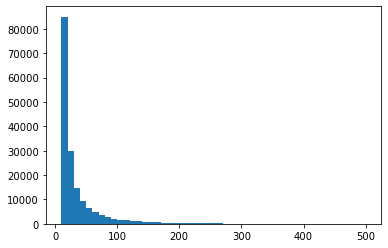

In [13]:
# Make Histogram
import matplotlib.pyplot as plt
plt.hist(user_game_counts['interact'],bins=range(10,510,10))
plt.show()

## 3. Most Popular Games

We can also see which games are the most popular, i.e. which have been purchased the most times. Perhaps unsurprisingly, all of the top titles were released by Valve, the company that owns and operates Steam. Initially Steam only distributed Valve games and since this data was collected in 2013, this could explain the heavy Valve favoritism.

In [14]:
# Get most popular games
game_downloads = data[['app_id','interact']].groupby('app_id', as_index=False).sum()
game_downloads.rename(columns = {'interact':'Downloads'},inplace=True)
game_downloads.sort_values(by='Downloads', ascending=False, inplace=True)

pd.options.mode.chained_assignment = None  # hide a warning
top_15 = game_downloads.iloc[:15]
app_dict = {340: 'Half-Life 2: Lost Coast', 240:'Counter-Strike: Source', 320:'Half-Life 2: Deathmatch',
            220:'Half-Life 2', 400:'Portal', 10:'Counter-Strike',
            550:'Left 4 Dead 2', 223530:'Left 4 Dead 2 Beta', 30:'Day of Defeat',
            40:'Deathmatch Classic',60:'Ricochet', 380:'Half-Life 2: Episode One',
            70:'Half-Life', 620: 'Portal 2', 440:'Team Fortress 2' ,}
top_15['App Name'] = [app_dict[app_id] for app_id in top_15['app_id']]
top_15

,app_id,Downloads,App Name
17,340,97485,Half-Life 2: Lost Coast
13,240,89539,Counter-Strike: Source
16,320,81463,Half-Life 2: Deathmatch
12,220,79254,Half-Life 2
20,400,71858,Portal
0,10,67586,Counter-Strike
24,550,64161,Left 4 Dead 2
2296,223530,63891,Left 4 Dead 2 Beta
2,30,56089,Day of Defeat
3,40,55431,Deathmatch Classic
